## Importing modules and running .py file

In [463]:
#Import modules #Run this once

import numpy as np
import pandas as pd
import os.path
from pylab import *
import glob
import os
import re
from xlwt import Workbook
from scipy.optimize import curve_fit
global pointnumber
from numpy import sqrt, pi, exp, linspace, loadtxt
from lmfit import  Model, Parameter, Parameters
import matplotlib.pyplot as plt

%matplotlib inline

In [464]:
#directories
import os
try:
    parentdir
except NameError:
    parentdir=os.getcwd()
else:
    parentdir = parentdir
homedir=r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201702_S101toS104/S101d14Feb17_60.5_635_A2_CuAzu655';#data directory
print('The working directory is parentdir: %s' %parentdir)
print('The data directory is homedir: %s' %homedir)

The working directory is parentdir: /home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/Azurin_SM_repo/Analysis
The data directory is homedir: /home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201702_S101toS104/S101d14Feb17_60.5_635_A2_CuAzu655


In [465]:
#list of folders and their directories
S101d14Feb17_60o5_635_A2_CuAzu655= r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201702_S101toS104/S101d14Feb17_60.5_635_A2_CuAzu655';
S101d15Feb17_60o5_635_A2_CuAzu655= r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201702_S101toS104/S101d15Feb17_60.5_635_A2_CuAzu655';
S101d15Feb17_62o2_635_A2_CuAzu655_2nd= r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201702_S101toS104/S101d15Feb17_62.2_635_A2_CuAzu655_2nd';
S101d16Feb17_60o5_635_A3_CuAzu655= r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201702_S101toS104/S101d16Feb17_60.5_635_A3_CuAzu655';
S104d20Feb17_60o5_635_A1_CuAzu655= r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201702_S101toS104/S104d20Feb17_60.5_635_A1_CuAzu655';
S104d21Feb17_60o5_635_A1_CuAzu655= r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201702_S101toS104/S104d21Feb17_60.5_635_A1_CuAzu655';
S104d21Feb17_60o5_635_A2_CuAzu655= r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201702_S101toS104/S104d21Feb17_60.5_635_A2_CuAzu655';
allfolders = [S101d14Feb17_60o5_635_A2_CuAzu655, S101d15Feb17_60o5_635_A2_CuAzu655, S101d15Feb17_62o2_635_A2_CuAzu655_2nd, S101d16Feb17_60o5_635_A3_CuAzu655,
             S104d20Feb17_60o5_635_A1_CuAzu655, S104d21Feb17_60o5_635_A1_CuAzu655, S104d21Feb17_60o5_635_A2_CuAzu655]

In [466]:
#Run this once to run the .py file.
os.chdir(parentdir)
!python Analysis_CuAz_April2017.py
%run Analysis_CuAz_April2017.py

## Figure Parameters

In [467]:
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.size"] = "14"

## Mid-Point potential histogram: Nernst equation

The file Point_A2_045mV(26)_60.5__30s_14.pt3.datn.em.plot does not exist
The file Point_A2_050mV(8)_60.5__30s_9.pt3.datn.em.plot does not exist
The file Point_A2_100mV(6)_60.5__30s_9.pt3.datn.em.plot does not exist
The file Point_A2_100mV(6)_60.5__30s_22.pt3.datn.em.plot does not exist
The file Point_A2_050mV(8)_60.5__30s_22.pt3.datn.em.plot does not exist
The file Point_A2_100mV(6)_60.5__30s_2.pt3.datn.em.plot does not exist
The file Point_A3_100mV(7)_60.5__30s_15.pt3.datn.em.plot does not exist
The file Point_A3_050mV(12)_60.5__30s_19.pt3.datn.em.plot does not exist
The file Point_A2_095mV(31)_60.5__30s_19.pt3.datn.em.plot does not exist
The file Point_A2_080mV(35)_60.5__30s_19.pt3.datn.em.plot does not exist
The file Point_A2_090mV(18)_60.5__30s_11.pt3.datn.em.plot does not exist
The file Point_A2_040mV(17)_60.5__30s_16.pt3.datn.em.plot does not exist
The average midpoint potential according to TT:
0.00121783186393
The average midpoint potential according to FCS:
0.0078543099261


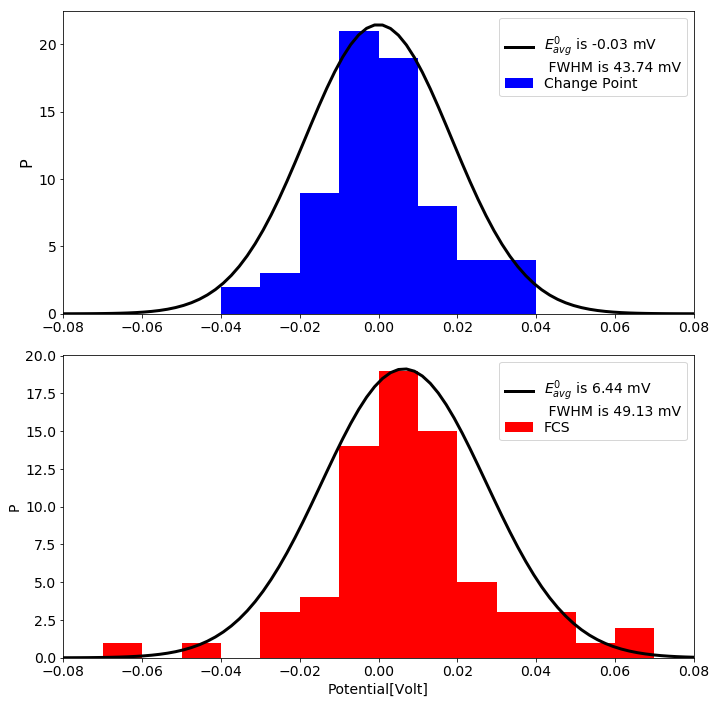

In [469]:
#Timetrace ratio t_off/t_on all days (FCS below specific potential) and FCS ratio
#All the values will be written in two different .xls files
#Folder names are the sheets.
#name excelfiles
os.chdir(r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201702_S101toS104')
excel_name = 't_ratio_TT.xls'
excel_name_FCS = 't_ratio_FCS.xls'

#potential > this value is TT, potential < this value is FCS
imp_pot = 40
tminFCS = 0.01
tmaxFCS = 10000
minimal_points = 5
inp_bins = 20 #bins of the histograms
#range of the fit histogram
min_range = -0.1
max_range = 0.1 
#range of the histograms
#TT 
min_x1 = -0.08
max_x1 = 0.08
#FCS
min_x2 = -0.08
max_x2 = 0.08
midpoint_potential_array, midpoint_potential_array_FCS = midpoint_histograms(excel_name, excel_name_FCS, imp_pot, tminFCS, tmaxFCS, minimal_points, inp_bins,
                                                                             min_range, max_range, min_x1, max_x1, min_x2, max_x2);

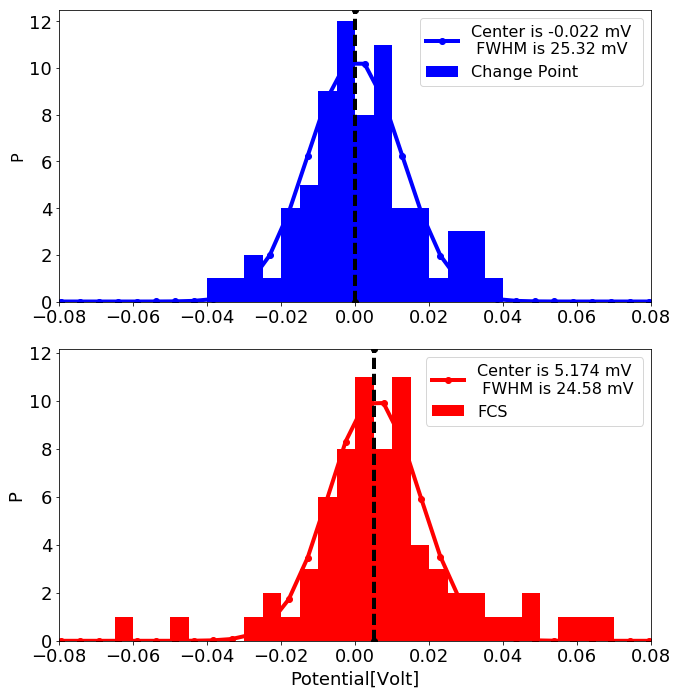

In [472]:
#MIDPOTENTIAL HISTGRAM FITTING
fig, axes = subplots(figsize=(10, 10), ncols=1, nrows=2)
# plt.figure()
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.size"] = "18"

range_fit = [min_range, max_range]
bins = 40
bin_centers_on = linspace(range_fit[0], range_fit[1], bins)
x=linspace(range_fit[0], range_fit[1], 100)# for a smooth fitting plot include more points

from scipy.interpolate import interp1d
from lmfit.models import GaussianModel
mod = GaussianModel()
# params = gmodel.make_params(center=0.01, amplitude=10, sigma=0.02)


#Change point--------------------------
n,bins_on1,patches = axes[0].hist(midpoint_potential_array, bins = bins, range=range_fit, color='b', label='Change Point')
# popt, pcov = curve_fit(gaus, bin_centers_on, n)
y=n; x=bin_centers_on;
result1 = mod.fit(y, center=0.01, amplitude=10, sigma=0.02, x=x)
temp =result1.best_values
FWHM = 2*temp['sigma']*1000 #V
cent = temp['center']*1000#eV
amp = temp['amplitude']

axes[0].plot(x, result1.best_fit, '-bo', lw=4, label='Center is %.3f mV \n FWHM is %.2f mV' %(cent, FWHM))
amp = temp['amplitude']
height = 0.3989423*amp/max(1.e-15, temp['sigma'])
axes[0].plot([cent*0.001, cent*0.001], [0, height+0.2*height], '--ok', lw=4)

axes[0].set_xlim(min_x1, max_x1)
axes[0].set_ylim(0,height+0.2*height)
axes[0].set_ylabel('P', fontsize=16)
axes[0].legend(fontsize=16)

#FCS plot------------------------------
n,bins_on1,patches = axes[1].hist(midpoint_potential_array_FCS, bins = bins, range=range_fit, color='r', label='FCS')
y=n; x=bin_centers_on;
result1 = mod.fit(y, center=0.01, amplitude=10, sigma=0.02, x=x)
temp =result1.best_values
FWHM = 2*temp['sigma']*1000 #V
cent = temp['center']*1000#eV
axes[1].plot(x, result1.best_fit, '-ro', lw=4, label='Center is %.3f mV \n FWHM is %.2f mV' %(cent, FWHM))
# axes[1].plot(x, gaus(x,*popt), color = 'k', linewidth = 3, label='$E^0_{avg}$ is %.2f mV\n FWHM is %.2f mV' %(E_mean, FWHM))
amp = temp['amplitude']
height = 0.3989423*amp/max(1.e-15, temp['sigma'])
axes[1].plot([cent*0.001, cent*0.001], [0, height+0.2*height], '--ok', lw=4)

axes[1].set_xlim(min_x2, max_x2)
axes[1].set_ylim(0,height+0.2*height)
axes[1].set_xlabel('Potential[Volt]')
axes[1].set_ylabel('P')
axes[1].legend(fontsize=16)

fig.tight_layout()
os.chdir(homedir)
fig.savefig('/home/biswajit/Pictures/canters_temp/MidpointPotential_distribution.pdf', dpi=300, transparent=True)
# figure()
# result.plot()

## Histograms (2D and 3D)

In [474]:
#*************Analysis for a specific potential********************
os.chdir(r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201702_S101toS104')
pointnumbers = 31 #Change this to the minimal amount of points
pot = 18 #number of potentials
specific_potential = 0 #the specific potential you want the plots for
max_his_on = 0.25
max_his_off = 3
rnge_on = [[0,max_his_on], [0,max_his_on]] #range on histograms, form: [[0,0.25], [0,0.25]] --> [xrange], [yrange]
rnge_off = [[0,max_his_off], [0, max_his_off]] #range off histograms
bins_on = 40  #bins for the on histograms
bins_off = 40 #bins for the off histograms
proteins = 'Cu' #change this to 'Zn' or 'Cu' depending on which files you are analysing. Changes title of plots.
# current_dir = '20160914_CuAzuA655_Ferri_Asc_A3_50mV_300s_analysed' #foldername you want to work in.
current_dir = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201702_S101toS104'
x_shift = 10 # t vs  t + x_shift 

df3, df_on_shifted, df_on_shifted_x, df3_off, df_off_shifted, df_off_shifted_x = histograms(pot, pointnumbers, specific_potential, rnge_on, rnge_off, bins_on, bins_off,
                                                           proteins, current_dir, max_his_on, max_his_off, x_shift, plots=False);


The file Point_A2_000mV(7)_60.5__30s_9.pt3.datn.em.plot does not exist
The file Point_A2_000mV(7)_60.5__30s_22.pt3.datn.em.plot does not exist
The file Point_A2_000mV(36)_60.5__30s_19.pt3.datn.em.plot does not exist


In [477]:
from mpl_toolkits.axes_grid.inset_locator import inset_axes
def inset_hist(axis, df,max_range = 2, bins=100, bins_inset=400):
    n_off,bins_off1,patches_off = axis.hist(df, range=(0,max_range),bins=200)
    axis.set_yticks([])
    axis.set_ylabel("#")
    axis.set_xscale("log")
#     axis.set_ylim(0, max(n_off))
#     insert_ax = inset_axes(axis,height="50%", width="50%")
#     n_off,bins_off1,patches_off = insert_ax.hist(df, range=(0,max_range),bins=bins_inset)
#     insert_ax.set_xlim(0, 0.1)

#     insert_ax.set_yticks([])
#     insert_ax.set_xticks([0, 0.1])
#     insert_ax.set_ylabel("#")
#     insert_ax.set_xscale("log")
#     return(axis, insert_ax)
    return(axis)

# fig, axes = plt.subplots(1,2, figsize=(10, 4))
# inset_hist(axes[0], df3)
# inset_hist(axes[1], df3_off)
# tight_layout()

The file Point_A2_100mV(6)_60.5__30s_9.pt3.datn.em.plot does not exist
The file Point_A2_100mV(6)_60.5__30s_22.pt3.datn.em.plot does not exist
The file Point_A2_100mV(6)_60.5__30s_2.pt3.datn.em.plot does not exist
The file Point_A3_100mV(7)_60.5__30s_15.pt3.datn.em.plot does not exist
The file Point_A2_050mV(8)_60.5__30s_9.pt3.datn.em.plot does not exist
The file Point_A2_050mV(8)_60.5__30s_22.pt3.datn.em.plot does not exist
The file Point_A3_050mV(12)_60.5__30s_19.pt3.datn.em.plot does not exist
The file Point_A2_090mV(18)_60.5__30s_11.pt3.datn.em.plot does not exist
The file Point_A2_100mV(6)_60.5__30s_9.pt3.datn.em.plot does not exist
The file Point_A2_100mV(6)_60.5__30s_22.pt3.datn.em.plot does not exist
The file Point_A2_100mV(6)_60.5__30s_2.pt3.datn.em.plot does not exist
The file Point_A3_100mV(7)_60.5__30s_15.pt3.datn.em.plot does not exist


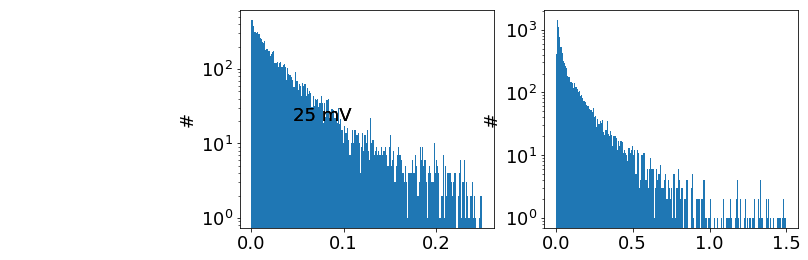

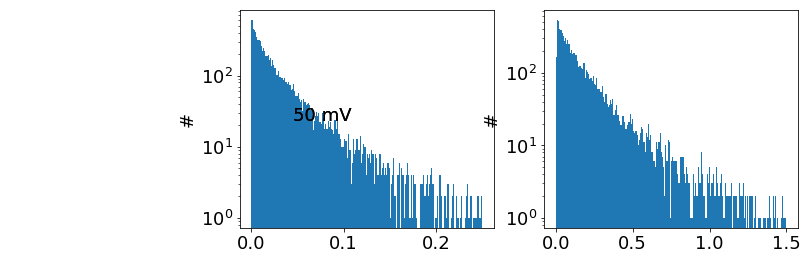

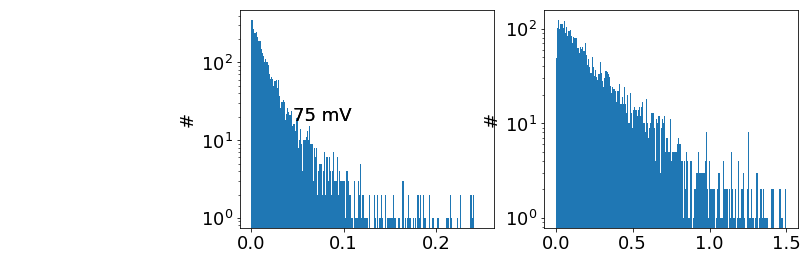

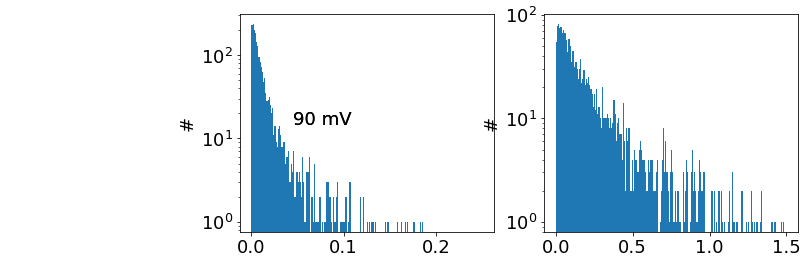

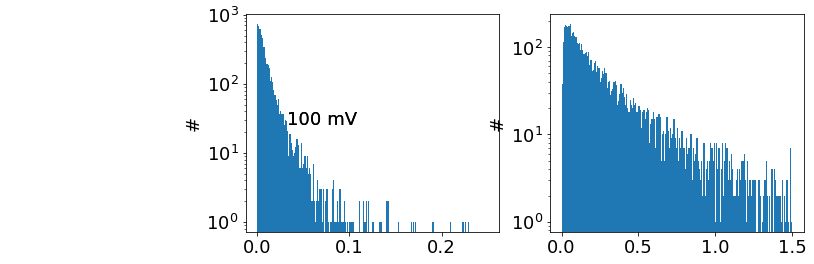

In [481]:
from mpl_toolkits.axes_grid.inset_locator import inset_axes

df3, df_on_shifted, df_on_shifted_x, df3_off, df_off_shifted, df_off_shifted_x = histograms(pot, pointnumbers, specific_potential, rnge_on, rnge_off, bins_on, bins_off,
                                                                                            proteins, current_dir, max_his_on, max_his_off, x_shift,plots=False)
# fig, ax = plt.subplots()
def inset_hist(axis=ax, df=df3,max_range = 2, bins=100, bins_inset=400, specific_potential=0):
    n_off,bins_off1,patches_off = axis.hist(df, range=(0,max_range),bins=200)
    axis.set_yticks([])
    axis.set_ylabel("#")
    axis.set_yscale("log")
    axis.text(0.8, 0.5,str(specific_potential)+' mV', horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
    axis.text(-0.5, 0.5,str(specific_potential)+' mV', horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
    return(axis)
############
potential_list = [25, 50, 75, 90, 100]
l = len(potential_list)
l=int(l)
for i in range(l):
    fig, axes = plt.subplots(1,2, figsize=(10, 4), squeeze=False)
    specific_potential = potential_list[i]
    df3, df_on_shifted, df_on_shifted_x, df3_off, df_off_shifted, df_off_shifted_x = histograms(pot, pointnumbers, specific_potential, rnge_on, rnge_off, bins_on, bins_off,
                                                       proteins, current_dir, max_his_on, max_his_off, x_shift,plots=False)
    inset_hist(axes[0, 0], df3, max_range=0.25, specific_potential=specific_potential)#ON-time (LEFT)
    inset_hist(axes[0, 1], df3_off, max_range=1.5, specific_potential=specific_potential) #OFF time(RIGHT)

The file Point_A2_000mV(7)_60.5__30s_9.pt3.datn.em.plot does not exist
The file Point_A2_000mV(7)_60.5__30s_22.pt3.datn.em.plot does not exist
The file Point_A2_000mV(36)_60.5__30s_19.pt3.datn.em.plot does not exist
The file Point_A2_050mV(8)_60.5__30s_9.pt3.datn.em.plot does not exist
The file Point_A2_050mV(8)_60.5__30s_22.pt3.datn.em.plot does not exist
The file Point_A3_050mV(12)_60.5__30s_19.pt3.datn.em.plot does not exist
The file Point_A2_100mV(6)_60.5__30s_9.pt3.datn.em.plot does not exist
The file Point_A2_100mV(6)_60.5__30s_22.pt3.datn.em.plot does not exist
The file Point_A2_100mV(6)_60.5__30s_2.pt3.datn.em.plot does not exist
The file Point_A3_100mV(7)_60.5__30s_15.pt3.datn.em.plot does not exist


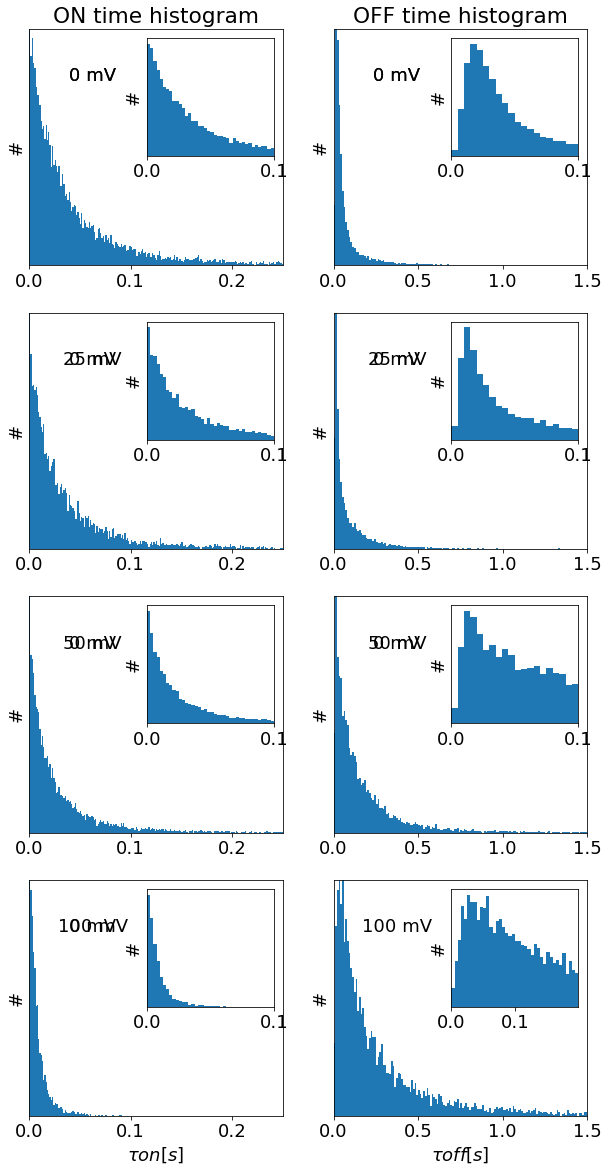

In [483]:
#HIstogram with zoom in
from mpl_toolkits.axes_grid.inset_locator import inset_axes
def inset_hist(axis, df,max_range = 2, bins=100, bins_inset=400,specific_potential=0):
    n_off,bins_off1,patches_off = axis.hist(df, range=(0,max_range),bins=200)
    axis.set_yticks([])
    axis.set_ylabel("#")
#     axis.set_yscale("log")
    axis.set_ylim(0, max(n_off))
    axis.text(0.25, 0.8,str(specific_potential)+' mV', horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
    insert_ax = inset_axes(axis,height="50%", width="50%")
    n_off,bins_off1,patches_off = insert_ax.hist(df, range=(0,max_range),bins=bins_inset)
    insert_ax.set_xlim(0, 0.1)

    insert_ax.set_yticks([])
    insert_ax.set_xticks([0, 0.1])
    insert_ax.set_ylabel("#")
#     insert_ax.set_xscale("log")
    return(axis, insert_ax)
#----------------------------------------------------#-----------------------------------
fig, axes = plt.subplots(4, 2, figsize=(10, 20), squeeze=False) #Set Figure/Subplot parameters
#0 mV: Define Potential Here
specific_potential = 0
df_on, df_on_shifted, df_on_shifted_x, df_off, df_off_shifted, df_off_shifted_x = histograms(pot, pointnumbers, specific_potential, rnge_on, rnge_off, bins_on, bins_off,
                                                       proteins, current_dir, max_his_on, max_his_off, x_shift,plots=False)
ax, in_ax = inset_hist(axes[0, 0], df_on, max_range = 0.25, bins=100, bins_inset=100)#ON hist-plot
ax.set_xlim(0, 0.25)
ax.text(0.25, 0.8,str(specific_potential)+' mV', horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
ax.set_title('ON time histogram')
ax, in_ax = inset_hist(axes[0, 1], df_off, max_range = 2, bins=100, bins_inset=400)#OFF hist-plot
ax.set_xlim(0, 1.5)
ax.text(0.25, 0.8,str(specific_potential)+' mV', horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
ax.set_title('OFF time histogram')
in_ax.set_yticks([]); in_ax.set_xticks([0, 0.1])

#----------------------------------------------------#-----------------------------------
#25 mV: Define Potential Here
specific_potential =25
df_on, df_on_shifted, df_on_shifted_x, df_off, df_off_shifted, df_off_shifted_x = histograms(pot, pointnumbers, specific_potential, rnge_on, rnge_off, bins_on, bins_off,
                                                       proteins, current_dir, max_his_on, max_his_off, x_shift,plots=False)
ax, in_ax = inset_hist(axes[1,0], df_on, max_range = 0.25, bins=100, bins_inset=100)#ON hist-plot
ax.set_xlim(0, 0.25)
ax.text(0.25, 0.8,str(specific_potential)+' mV', horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
ax, in_ax = inset_hist(axes[1,1], df_off, max_range = 2, bins=100, bins_inset=400)#OFF hist-plot
ax.set_xlim(0, 1.5)
ax.text(0.25, 0.8,str(specific_potential)+' mV', horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
ax.set_ylabel("#"); in_ax.set_ylabel("#")

#----------------------------------------------------#-----------------------------------
#50 mV: Define Potential Here
specific_potential =50
df_on, df_on_shifted, df_on_shifted_x, df_off, df_off_shifted, df_off_shifted_x = histograms(pot, pointnumbers, specific_potential, rnge_on, rnge_off, bins_on, bins_off,
                                                       proteins, current_dir, max_his_on, max_his_off, x_shift,plots=False)
ax, in_ax = inset_hist(axes[2,0], df_on, max_range = 0.25, bins=100, bins_inset=100)#ON hist-plot
ax.set_xlim(0, 0.25)
ax.text(0.25, 0.8,str(specific_potential)+' mV', horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
ax, in_ax = inset_hist(axes[2,1], df_off, max_range = 2, bins=100, bins_inset=400)#OFF hist-plot
ax.set_xlim(0, 1.5)
ax.text(0.25, 0.8,str(specific_potential)+' mV', horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
ax.set_ylabel("#"); in_ax.set_ylabel("#")

#----------------------------------------------------#-----------------------------------
#100 mV: Define Potential Here
specific_potential =100
df_on, df_on_shifted, df_on_shifted_x, df_off, df_off_shifted, df_off_shifted_x = histograms(pot, pointnumbers, specific_potential, rnge_on, rnge_off, bins_on, bins_off,
                                                       proteins, current_dir, max_his_on, max_his_off, x_shift,plots=False)
ax, in_ax = inset_hist(axes[3,0], df_on, max_range = 0.25, bins=100, bins_inset=100)#ON hist-plot
ax.set_xlim(0, 0.25)
ax.text(0.25, 0.8,str(specific_potential)+' mV', horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
ax.set_xlabel(r"$\tau{on}[s]$")

ax, in_ax = inset_hist(axes[3,1], df_off, max_range = 2, bins=100, bins_inset=400)#OFF hist-plot
ax.set_xlim(0, 1.5)
ax.text(0.25, 0.8,str(specific_potential)+' mV', horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
ax.set_xlabel(r"$\tau{off}[s]$")
in_ax.set_xlim(0, 0.2)
# tight_layout()

fig.savefig('/home/biswajit/Pictures/canters_temp/Fig_4-4_onoff_hist.pdf', dpi=300, transparent=True)

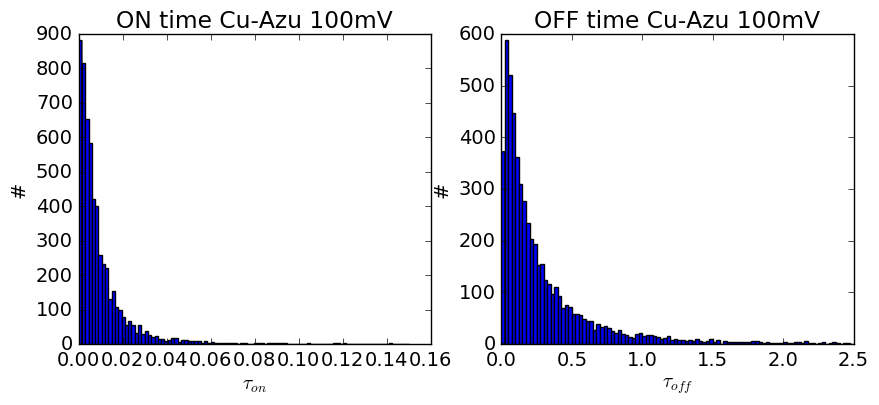

In [7]:
max_his_on = 0.15; max_his_off = 2.5;
bins_on = 100; bins_off = 100
fig1, axes1 = plt.subplots(1, 2, figsize=(10,4))

n,bins_on1,patches = axes1[0].hist(df3, range=(0,max_his_on),bins=bins_on)
axes1[0].set_xlabel(r'$\tau_{on}$')
axes1[0].set_ylabel('#')
# axes1[0].set_yscale('log')
axes1[0].set_title("ON time %s-Azu %smV" %(proteins, specific_potential))

n_off,bins_off1,patches_off = axes1[1].hist(df3_off, range=(0,max_his_off),bins=bins_off)
axes1[1].set_xlabel(r'$\tau_{off}$')
axes1[1].set_ylabel('#')
# axes1[1].set_yscale('log')
axes1[1].set_title('OFF time %s-Azu %smV' %(proteins, specific_potential))


### Off histogram

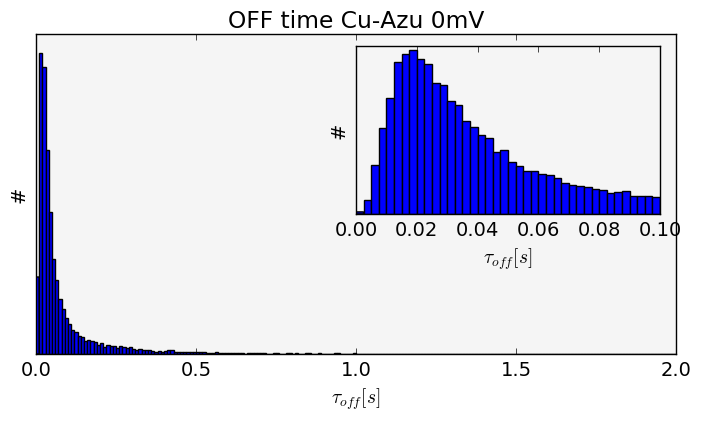

In [47]:
# df3, df_on_shifted, df_on_shifted_x, df3_off, df_off_shifted, df_off_shifted_x = histograms(pot, pointnumbers, specific_potential, rnge_on, rnge_off, bins_on, bins_off,
#                                                                                             proteins, current_dir, max_his_on, max_his_off, x_shift,plots=False)
def inset_hist(df3_off, max_range=0.25, bins=100, bins_inset=200):
    fig = plt.figure(figsize=(8, 4))
    #outer figure
    ax = fig.add_axes([0.1, 0.15, 0.8, 0.8], axisbg="#f5f5f5")
    n_off,bins_off1,patches_off = ax.hist(df3_off, range=(0,max_his_off),bins=200)
    ax.set_ylabel('#')
    ax.set_yticks([])
    # axes1[1].set_yscale('log')
    ax.set_title('OFF time %s-Azu %smV' %(proteins, specific_potential))
    
    #inset figure
    ax = fig.add_axes([0.5, 0.5, 0.38, 0.42], axisbg='none')
    n_off,bins_off1,patches_off = ax.hist(df3_off, range=(0,max_his_off),bins=800)
    ax.set_xlim(0, 0.1)
    ax.set_xlabel(r'$\tau_{off}[s]$')
    ax.set_ylabel('#')
    ax.set_yticks([])

### ON-time histogram

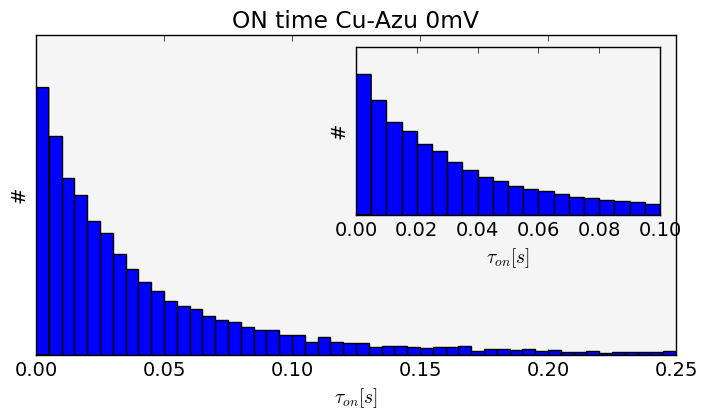

In [48]:
# df3, df_on_shifted, df_on_shifted_x, df3_off, df_off_shifted, df_off_shifted_x = histograms(pot, pointnumbers, specific_potential, rnge_on, rnge_off, bins_on, bins_off,
#                                                                                             proteins, current_dir, max_his_on, max_his_off, x_shift,plots=False)
max_his_on = 0.15; max_his_off = 0.25;
# bins_on = 100; bins_off = 400
fig = plt.figure(figsize=(8, 4))
ax = fig.add_axes([0.1, 0.15, 0.8, 0.8], axisbg="#f5f5f5")
n_off,bins_off1,patches_off = ax.hist(df3, range=(0,max_his_off),bins=50, color = 'blue')
ax.set_xlabel(r'$\tau_{on}[s]$')
ax.set_ylabel('#')
ax.set_yticks([])
# axes1[1].set_yscale('log')
ax.set_title('ON time %s-Azu %smV' %(proteins, specific_potential))

ax = fig.add_axes([0.5, 0.5, 0.38, 0.42], axisbg='none')
n_off,bins_off1,patches_off = ax.hist(df3, range=(0,max_his_off),bins=50, color='blue')
ax.set_xlim(0, 0.1)
ax.set_xlabel(r'$\tau_{on}[s]$')
ax.set_ylabel('#')
ax.set_yticks([])
savefig(homedir+'/ON.pdf', dpi=300, transparent=True)

### 2D histogram

In [435]:
#*************Analysis for a specific potential********************
os.chdir(homedir)
pointnumbers = 31 #Change this to the minimal amount of points
pot = 18 #number of potentials
specific_potential = 100 #the specific potential you want the plots for
max_his_on = 0.25
max_his_off = 3
rnge_on = [[0,max_his_on], [0,max_his_on]] #range on histograms, form: [[0,0.25], [0,0.25]] --> [xrange], [yrange]
rnge_off = [[0,max_his_off], [0, max_his_off]] #range off histograms
bins_on = 40  #bins for the on histograms
bins_off = 40 #bins for the off histograms
proteins = 'Cu' #change this to 'Zn' or 'Cu' depending on which files you are analysing. Changes title of plots.
# current_dir = '20160914_CuAzuA655_Ferri_Asc_A3_50mV_300s_analysed' #foldername you want to work in.
current_dir = homedir
x_shift = 50 # t vs  t + x_shift 

df3, df_on_shifted, df_on_shifted_x, df3_off, df_off_shifted, df_off_shifted_x = histograms(pot, pointnumbers, specific_potential, rnge_on, rnge_off, bins_on, bins_off,
                                                           proteins, current_dir, max_his_on, max_his_off, x_shift, plots=False);

The file Point_A2_100mV(6)_60.5__30s_2.pt3.datn.em.plot does not exist
The file Point_A2_100mV(6)_60.5__30s_22.pt3.datn.em.plot does not exist
The file Point_A2_100mV(6)_60.5__30s_9.pt3.datn.em.plot does not exist
The file Point_A3_100mV(7)_60.5__30s_15.pt3.datn.em.plot does not exist


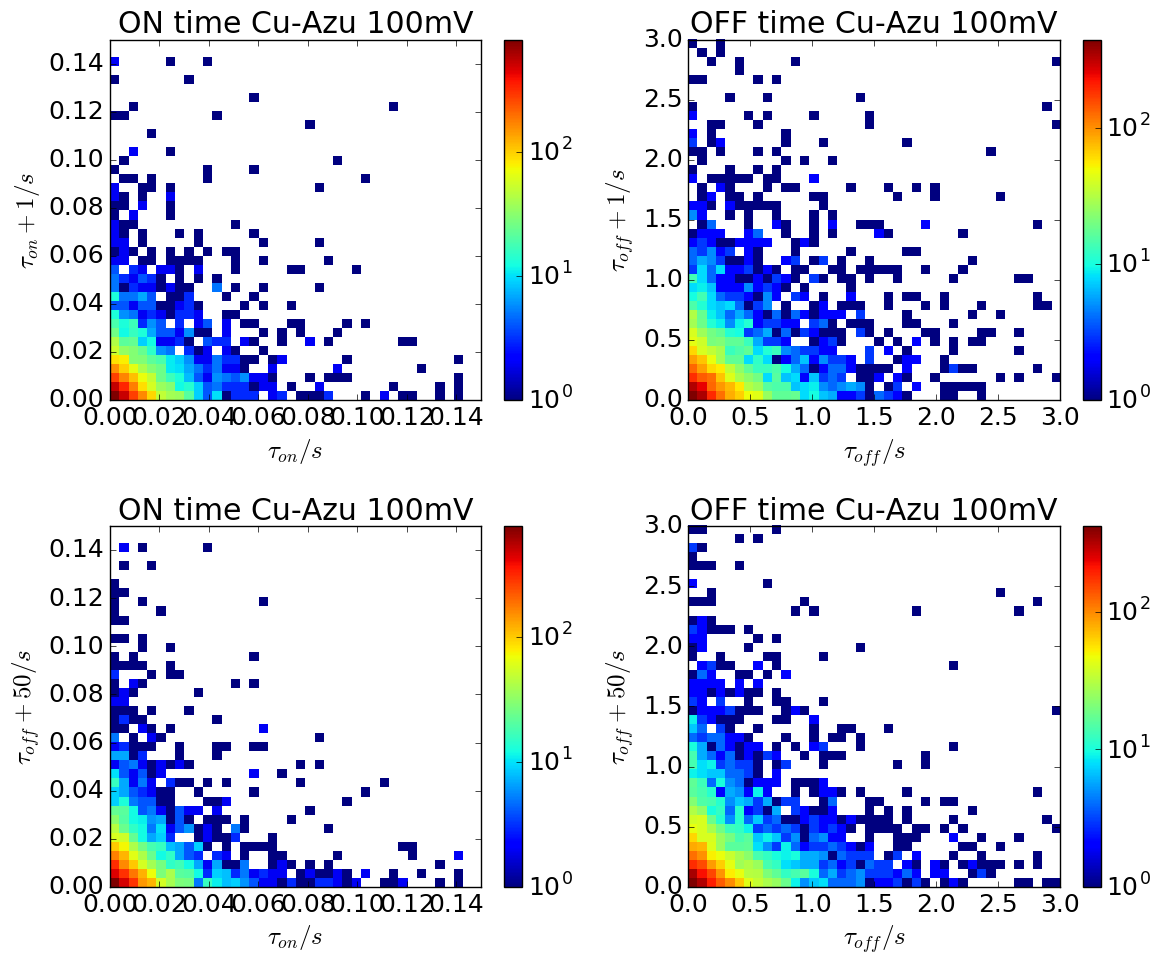

In [437]:
max_his_on = 0.15
max_his_off = 3
rnge_on = [[0,max_his_on], [0,max_his_on]] #range on histograms, form: [[0,0.25], [0,0.25]] --> [xrange], [yrange]
rnge_off = [[0,max_his_off], [0, max_his_off]] #range off histograms
bins_on = 40  #bins for the on histograms
bins_off = 40 #bins for the off histograms

#
fig2 = plt.figure(figsize=(12,10))
ax3 = fig2.add_subplot(2,2,1)
hist2d(df3[specific_potential],df_on_shifted[specific_potential], range=rnge_on ,bins=bins_on, norm=LogNorm());
colorbar()
ax3.set_title('ON time %s-Azu %smV' %(proteins, specific_potential))
ax3.set_xlabel(r'$\tau_{on}/s$')
ax3.set_ylabel(r'$\tau_{on}+1/s$')

ax4 = fig2.add_subplot(2,2,2)
hist2d(df3_off[specific_potential],df_off_shifted[specific_potential], range=rnge_off,bins=bins_off, norm=LogNorm());
colorbar()
ax4.set_title('OFF time %s-Azu %smV' %(proteins, specific_potential))
ax4.set_xlabel(r'$\tau_{off}/s$')
ax4.set_ylabel(r'$\tau_{off}+1/s$')
plt.tight_layout()

ax5 = fig2.add_subplot(2,2,3)
hist2d(df3[specific_potential],df_on_shifted_x[specific_potential], range=rnge_on ,bins=bins_on, norm=LogNorm());
colorbar()
ax5.set_title('ON time %s-Azu %smV' %(proteins, specific_potential))
ax5.set_xlabel(r'$\tau_{on}/s$')
ax5.set_ylabel(r'$\tau_{off}+%s/s$' %x_shift)

ax6 = fig2.add_subplot(2,2,4)
hist2d(df3_off[specific_potential],df_off_shifted_x[specific_potential], range=rnge_off,bins=bins_off, norm=LogNorm());
colorbar()
ax6.set_title('OFF time %s-Azu %smV' %(proteins, specific_potential))
ax6.set_xlabel(r'$\tau_{off}/s$')
ax6.set_ylabel(r'$\tau_{off}+%s/s$' %x_shift)
plt.tight_layout()    

## Test code

In [485]:
#Run this once to run the .py file.
os.chdir(parentdir)
!python Analysis_bis.py
%run Analysis_bis.py

In [8]:
df_datn_emplot, df_FCS, folder = dir_mV_molNo(homedir)
df_datn_emplot.head(5)
df_FCS.head()

,Point number,Potential,filename[FCS],filepath[FCS]
0,6.0,25.0,Point_A2_025mV(9)_60.5__30s_6_FCS1.dat,/home/biswajit/Research/Reports_ppt/reports/Az...
1,6.0,60.0,Point_A2_060mV(16)_60.5__30s_6_FCS1.dat,/home/biswajit/Research/Reports_ppt/reports/Az...
2,6.0,25.0,Point_A2_025mV(15)_60.5__30s_6_FCS1.dat,/home/biswajit/Research/Reports_ppt/reports/Az...
3,6.0,50.0,Point_A2_050mV(13)_60.5__30s_6_FCS1.dat,/home/biswajit/Research/Reports_ppt/reports/Az...
4,6.0,100.0,Point_A2_100mV(8)_60.5__30s_6_FCS1.dat,/home/biswajit/Research/Reports_ppt/reports/Az...


### Writing, saving and reading Excel (with MutiIndex)

In [31]:
# #saving
# writer = pd.ExcelWriter('output.xlsx')
# df1.to_excel(writer,'Sheet1')
# df2.to_excel(writer,'Sheet2')
# writer.save()
# #Reading
# df_excel = pd.read_excel('output.xlsx', sheetname='shheeet', header=[0,1], index_col=[0])
# # df_excel

### Timetrace plot

0.0
25.0
100.0
50.0


/home/biswajit/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/home/biswajit/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


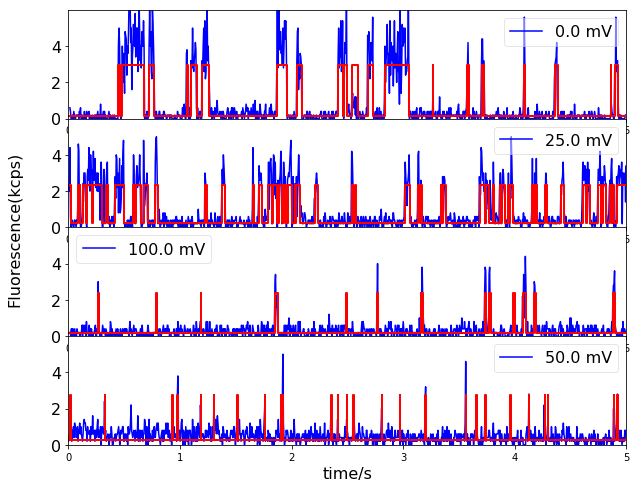

In [14]:
# folderpath = r'D:\Research\Experimental\Analysis\2017analysis\201702\Analysis_Sebby_March_2017\S101d14Feb17_60.5_635_A2_CuAzu655'
fig = time_trace_plot(foldername= homedir, input_potential=[0, 25, 50, 100], pointnumbers=[1], x_lim_min=0, y_lim_min=0, x_lim_max=5, y_lim_max=6, bin=5, show_changepoint=True)

### FCS plot

#### A+Bexp(-t/t_ac)

$$C_1(t)=\frac{<I_{CW}(0)I_{CW}(t)> - <I_{CW}>^2}{<I_{CW}^2>-<I_{CW}>^2}$$

$$C_1(t)=A+Be^{\frac{-t}{\tau_{ac}}}$$

$$\frac{1}{\tau_{ac}} = \frac{1}{\tau_{on}}+\frac{1}{\tau_{off}}$$

$$\frac{\tau_{on}}{\tau_{off}} = \frac{A}B$$

$$\tau_{off} = \tau_{ac}\Bigg(1+\frac{B}A\Bigg)$$

$$\tau_{on} = \tau_{ac}\Bigg(1+\frac{A}B\Bigg)$$

(6.9925577348244952,
 11.368786931556489,
 18.165615972123291,
 0.62584098161069102)

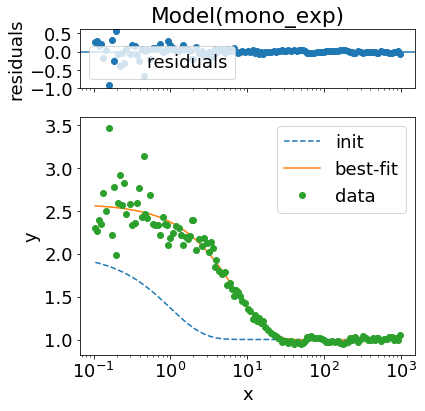

In [715]:
df_datn_em_specific, df_fcs_specific = get_point_specifics(foldername= homedir, input_potential=[100], pointnumbers=[7])
df_fcs=df_fcs_specific['filepath[FCS]'][0]
df_emplot = df_datn_em_specific['filepath[.em.plot]'][0]
def FCS_mono_fit(df_fcs,df_emplot, tmin=0.1,tmax=1000):
    df_fcs = pd.read_csv(df_fcs, index_col=False, names=None, skiprows=1, header=None, sep='\s+');
    df_fcs = df_fcs[df_fcs[0]>=tmin];
    df_fcs = df_fcs[df_fcs[0]<=tmax];
    xdata=df_fcs[0];
    ydata=df_fcs[1];
    df_em = pd.read_csv(df_emplot, header=None, sep='\t')#changepoint
    S=max(df_em[1]);
    Bkr=min(df_em[1]);
    ydata=1+((ydata)*(S/(S+Bkr))**-2)
    def mono_exp(x, A, B, t_ac):
        return((A+(B*exp(-x/t_ac))))
    gmodel = Model(mono_exp)
    gmodel.set_param_hint('A', value=1, min=0, max=10)
    gmodel.set_param_hint('B', value=1, min=0, max=100)
    gmodel.set_param_hint('t_ac', value=1, min=0.1, max=100)
    pars = gmodel.make_params()
    result = gmodel.fit(ydata, pars, x=xdata)#, A=1, B=1, t_ac=1
    A = result.best_values['A']
    B = result.best_values['B']
    t_ac = result.best_values['t_ac']
    t_on = t_ac * (1+(A/B))
    t_off = t_ac * (1+(B/A))
    tratio_on_off = A/B
    return(t_ac, t_on, t_off, tratio_on_off, result)#, t_on_err, t_off_err
t_ac, t_on, t_off, tratio_on_off, result = FCS_mono_fit(df_fcs, df_emplot)
result.plot()
xscale('log')
t_ac, t_on, t_off, tratio_on_off

##### Curve_fit

0.041986534768292179

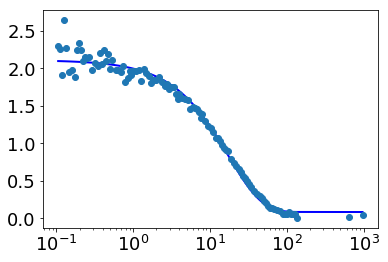

In [810]:
df_datn_em_specific, df_fcs_specific = get_point_specifics(foldername= homedir, input_potential=[60], pointnumbers=[9])
df_fcs=df_fcs_specific['filepath[FCS]'][0]
df_emplot = df_datn_em_specific['filepath[.em.plot]'][0]
df_datn = df_datn_em_specific['filepath[.datn]'][0]
filename = df_fcs
def FCS_mono_fit(filename,tmin,tmax):
    df_fcs = pd.read_csv(filename, index_col=False, names=None, skiprows=1, header=None, sep='\ ', engine='python');
    df_fcs = df_fcs[df_fcs[0]>=tmin];
    df_fcs = df_fcs[df_fcs[0]<=tmax];
    df_fcs = df_fcs[np.isfinite(df_fcs[2])]
    np.isnan(df_fcs[0]);#removing nan file
    xdata=df_fcs[0];
    ydata=df_fcs[2];
    def mono_exp(x, A1, A2, t1):
        return((A1+A2*exp(-x/t1)))
    monofit, pcov_mono = curve_fit(mono_exp, xdata, ydata, p0 = [10, 1, 1], bounds=(0, np.inf))
    plot(xdata, mono_exp(xdata, *monofit), color = 'b', linewidth=2.0)
    plot(xdata, ydata, 'o')
    xscale('log')
    return(monofit)
def FCS_bi_fit(filename,tmin,tmax):
    df_fcs = pd.read_csv(filename, index_col=False, names=None, skiprows=1, header=None, sep='\ ', engine='python');
    df_fcs = df_fcs[df_fcs[0]>=tmin];
    df_fcs = df_fcs[df_fcs[0]<=tmax];
    df_fcs = df_fcs[np.isfinite(df_fcs[2])]
    np.isnan(df_fcs[0]);#removing nan file
    xdata=df_fcs[0];
    ydata=df_fcs[2];
    def bi_exp(x, A1, A2, t1, A3, t2):
        return((A1+A2*exp(-x/t1)+A3*exp(-x/t2)))
    bi_fit, pcov_mono = curve_fit(bi_exp, xdata, ydata, p0 = [10, 1, 1, 1, 1], bounds=(0, np.inf))
    plot(xdata, bi_exp(xdata, *bi_fit), color = 'b', linewidth=2.0)
    plot(xdata, ydata, 'o')
    xscale('log')
    return(bi_fit)
# bi_fit = FCS_bi_fit(filename, tmin=1, tmax=1000)
# tratio1 = bi_fit[0]/bi_fit[1];
# tratio2 = bi_fit[0]/bi_fit[3];
# tratio1, tratio2

monofit = FCS_mono_fit(filename, tmin=0.1, tmax=1000)
tratio = monofit[0]/monofit[1];
tratio

#### 1-F+Fexp(-t/t_ac)

(0.67572716255042997,
 4.7185215960563873,
 6.9828798627052988,
 14.551084923325401,
 0.47988723174254427)

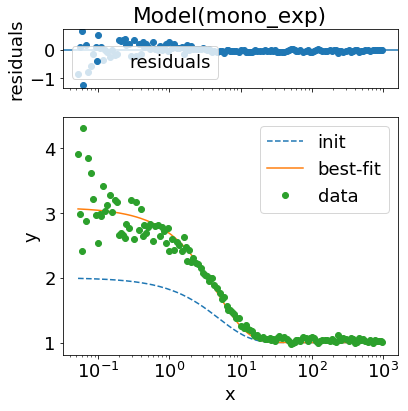

In [698]:
df_datn_em_specific, df_fcs_specific = get_point_specifics(foldername= homedir, input_potential=[75], pointnumbers=[1])
df_fcs=df_fcs_specific['filepath[FCS]'][0]
df_emplot = df_datn_em_specific['filepath[.em.plot]'][0]
df_datn = df_datn_em_specific['filepath[.datn]'][0]
def FCS_mono_fit(df_fcs,df_emplot, tmin=0.05,tmax=1000):
    df_fcs = pd.read_csv(df_fcs, index_col=False, names=None, skiprows=1, header=None, sep='\s+');
    df_fcs = df_fcs[df_fcs[0]>=tmin];
    df_fcs = df_fcs[df_fcs[0]<=tmax];
    xdata=df_fcs[0];
    ydata=df_fcs[1];
    df_em = pd.read_csv(df_emplot, header=None, sep='\t')#changepoint
    S=max(df_em[1]);
    Bkr=min(df_em[1]);
    correction_BG = (S/(S+Bkr))**2
    ydata= 1+((ydata)/correction_BG)
    def mono_exp(x, F, t_ac):
        return (1-F + (F*exp(-x/t_ac)))/(1-F)
    gmodel = Model(mono_exp)
    gmodel.set_param_hint('F', value=0.5, min=0.05, max=1)
    gmodel.set_param_hint('t_ac', value=5, min=1, max=100)
    pars = gmodel.make_params()
    result = gmodel.fit(ydata, pars, x=xdata)#, A=1, B=1, t_ac=1
    F = result.best_values['F']
    t_ac = result.best_values['t_ac']
    #t_on = t_ac * (1+(A/B))
    #t_off = t_ac * (1+(B/A))
    kf = F/t_ac; kb = (1-F)/t_ac
    ton = 1/kf; toff = 1/kb;
    tratio_on_off = ton/toff
    return(F, t_ac, ton, toff, tratio_on_off, result)#, t_on_err, t_off_err
F, t_ac, ton, toff, tratio_on_off, result = FCS_mono_fit(df_fcs, df_emplot)
result.plot()
xscale('log')
F, t_ac, ton, toff, tratio_on_off

0.030805567698277931

#### Aexp(-t/t_ac)

(6.9828638261407425, 14.551056252593797, 0.47988707520088192)

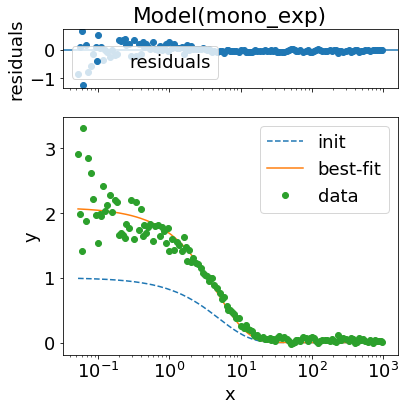

In [710]:
df_datn_em_specific, df_fcs_specific = get_point_specifics(foldername= homedir, input_potential=[75], pointnumbers=[1])
df_fcs=df_fcs_specific['filepath[FCS]'][0]
df_emplot = df_datn_em_specific['filepath[.em.plot]'][0]
df_datn = df_datn_em_specific['filepath[.datn]'][0]
def FCS_mono_fit(df_fcs,df_emplot, tmin=0.05,tmax=1000):
    df_fcs = pd.read_csv(df_fcs, index_col=False, names=None, skiprows=1, header=None, sep='\s+');
    df_fcs = df_fcs[df_fcs[0]>=tmin];
    df_fcs = df_fcs[df_fcs[0]<=tmax];
    xdata=df_fcs[0];
    ydata=df_fcs[1];
    df_em = pd.read_csv(df_emplot, header=None, sep='\t')#changepoint
    S=max(df_em[1]);
    Bkr=min(df_em[1]);
    correction_BG = (S/(S+Bkr))**2
    ydata= ((ydata)/correction_BG)
    def mono_exp(x, A, t_ac, t_rise):
        return A*exp(-x/t_ac)
    gmodel = Model(mono_exp)
    gmodel.set_param_hint('A', value=1, min=0.05, max=100)
    gmodel.set_param_hint('t_ac', value=5, min=1, max=100)
    gmodel.set_param_hint('t_rise', value=5, min=1, max=100)
    pars = gmodel.make_params()
    result = gmodel.fit(ydata, pars, x=xdata)#, A=1, B=1, t_ac=1
    A = result.best_values['A']
    t_ac = result.best_values['t_ac']
    toff = t_ac*(1+A); ton = t_ac*(1+(1/A));
    tratio_on_off = ton/toff
    return(ton, toff, tratio_on_off, result)#, t_on_err, t_off_err
ton, toff, tratio_on_off, result = FCS_mono_fit(df_fcs, df_emplot)
result.plot()
xscale('log')
ton, toff, tratio_on_off

##### curve_fit: Aexp(-t/t_ac)

(6.9829449191050372, 14.551201261920372, 0.47988786584781756)

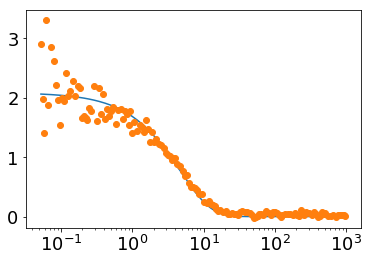

In [781]:
df_datn_em_specific, df_fcs_specific = get_point_specifics(foldername= homedir, input_potential=[75], pointnumbers=[1])
df_fcs=df_fcs_specific['filepath[FCS]'][0]
df_emplot = df_datn_em_specific['filepath[.em.plot]'][0]
df_datn = df_datn_em_specific['filepath[.datn]'][0]
def FCS_mono_fit(df_fcs,df_emplot, tmin=0.05,tmax=1000):
    df_fcs = pd.read_csv(df_fcs, index_col=False, names=None, skiprows=1, header=None, sep='\s+');
    df_fcs = df_fcs[df_fcs[0]>=tmin];
    df_fcs = df_fcs[df_fcs[0]<=tmax];
    xdata=df_fcs[0];
    ydata=df_fcs[1];
    df_em = pd.read_csv(df_emplot, header=None, sep='\t')#changepoint
    S=max(df_em[1]);
    Bkr=min(df_em[1]);
    correction_BG = (S/(S+Bkr))**2
    ydata= ((ydata)/correction_BG)
    def mono_exp(x, A, t_ac):
        return A*exp(-x/t_ac)
    monofit, pcov = curve_fit(mono_exp, xdata, ydata, p0 = [1, 1], bounds=(0, np.inf))
    plot(xdata, mono_exp(xdata, *monofit))
    plot(xdata, ydata, 'o')
    xscale('log')
    A=monofit[0]; t_ac = monofit[1];
    toff = t_ac*(1+A); ton = t_ac*(1+(1/A));
    tratio_on_off = ton/toff
    return(ton, toff, tratio_on_off, monofit)#, t_on_err, t_off_err
ton, toff, tratio_on_off, monofit = FCS_mono_fit(df_fcs, df_emplot)
ton, toff, tratio_on_off

#### timetrace-check

In [713]:
fig = time_trace_plot(foldername= homedir, input_potential=[75], pointnumbers=[1], x_lim_min=0, y_lim_min=0, x_lim_max=5, y_lim_max=5, bin=5, show_changepoint=True)
df_ton, df_toff, average_ton, average_toff = t_on_off(df_datn, df_emplot);
average_ton, average_toff, average_ton/average_toff

0.0
g(t) = 6.84598805194e-19 + 2.49653456692 * exp(-t/30.2389594619) + 1.11411557832 * exp(-t/0.410722485079)
25.0
g(t) = 0.0117917539457 + 1.38967835671 * exp(-t/18.142695955) + 0.569739242554 * exp(-t/0.116687910694)
50.0
g(t) = 1.8284518742e-16 + 1.22477622473 * exp(-t/2.5909552564) + 0.0907577554916 * exp(-t/0.30713729472)
100.0
g(t) = 3.06741273527e-18 + 1.86741523295 * exp(-t/7.58070070398) + 1.01167358988 * exp(-t/0.28792665321)


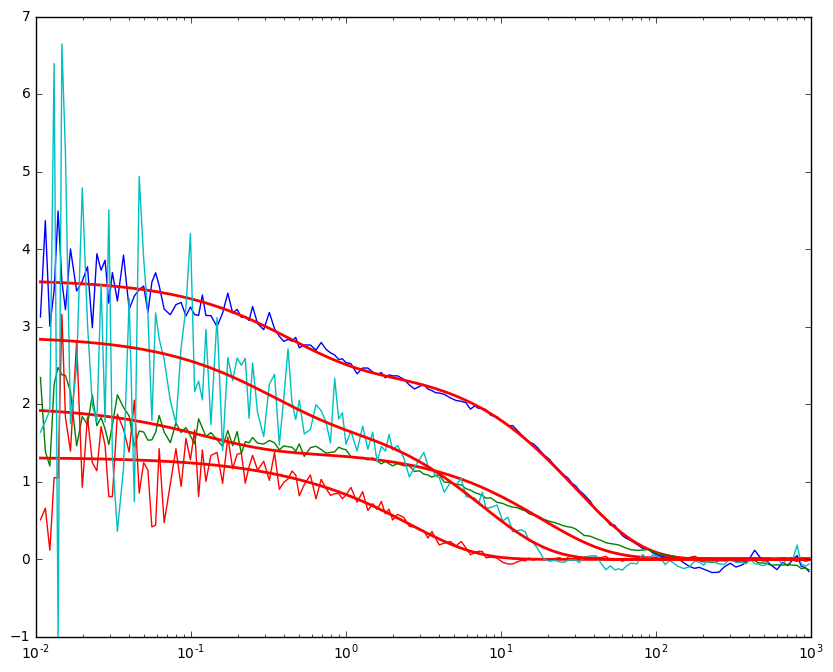

In [49]:
fig=FCS_plot(foldername= foldername, tmin=0.01) # FCS_plot(foldername= foldername, input_potential=[0, 25, 50, 100], pointnumbers=[1], tmin=0.005, tmax=1000, kind='bi')

In [69]:
out_total = timetrace_outputs_folderwise(folderpath=homedir, pointnumbers=[3], potentialist=potentialist)
out_total

/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/Azurin_SM_repo/Analysis/Analysis_bis.py:278: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  df_datnem_specific = df_datnem_specific.sort(['Potential'], ascending=[1])
/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/Azurin_SM_repo/Analysis/Analysis_bis.py:282: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  df_fcs_specific = df_fcs_specific.sort(['Potential'], ascending=[1])


Point_3                                                                    \
  Potential t_ratio_timetrace                                                   
  Potential            t_onav t_onaverr t_offav t_offaverr t_ratio t_ratioerr   
0       0.0               0.0       1.0     3.0        4.0    10.0       20.0   
1      25.0               1.0       2.0     4.0        5.0    11.0       21.0   
2      75.0               2.0       3.0     5.0        6.0    12.0       22.0   
3     100.0               3.0       4.0     6.0        7.0    13.0       23.0   

                                                               
  t_ratio_FCS                                                  
       t_onav t_onaverr t_offav t_offaverr t_ratio t_ratioerr  
0         0.0       0.0     1.0        0.0     0.0        0.0  
1         2.0       5.0     2.0        0.5     6.0        7.0  
2         4.0      10.0     3.0        1.0    12.0       14.0  
3         6.0      15.0     4.0        1.5    18.0       21.0